In [1]:
#import torch vision and other necessary libraries help load CIFAR10 data.
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
#implement the test loader functions 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #normalizing image inputs

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) #transforming train set

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2) # loader for trainset

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) #transforming test set
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2) #loader for test set
# different classes 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


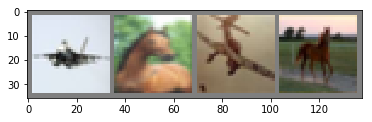

plane horse plane horse


In [17]:
#funtion to show images
def imshow(image):
    image = image / 2 + 0.5     # unnormalize image
    npimg = image.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images for showing purposes
dataiter = iter(trainloader)
images, labels = dataiter.next()

# showing images
imshow(torchvision.utils.make_grid(images))
# printing labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
#building the Neural Network.
class Net(nn.Module):  #allows us to inherit form the Network parent class so we can call some modules
    def __init__(self):
        super(Net, self).__init__()  #initialize the network
        self.conv1 = nn.Conv2d(3, 6, 5) # first layer: in_channel=3, out_channel= 6 and kernel_size =5
        self.pool = nn.MaxPool2d(2, 2)  #max pooling is to downsample the images
        self.conv2 = nn.Conv2d(6, 16, 5) # second layer: in_channel = 6, out_channel=16 and kernel = 5
        #from the two layers defined above, we produce a 16*5*5 features that is later fed into the linear layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)#  in_features = 16*5*5, out_features=120
        self.fc2 = nn.Linear(120, 84) #in_features=120, out_features=84
        self.fc3 = nn.Linear(84, 10) # in_featuers= 84, out features=10 for 10 classes.

    def forward(self, x):    #gets some data (x) and passes it through the different layers created
        x = self.pool(F.relu(self.conv1(x))) # passing data(x) through conv layer 1
        x = self.pool(F.relu(self.conv2(x))) #passing data(x) through conv layer 2
        x = x.view(-1, 16 * 5 * 5) # Passing data(x) through view so it will be ready for linear layers 
        x = F.relu(self.fc1(x)) #Passing data(x) through linear layer1 
        x = F.relu(self.fc2(x))  #passing data(x) through linear layer2
        x = self.fc3(x)         #passing data(x) through linear layer 3
        return x                #returning data(x)


net = Net()            #creating an object of the network


In [19]:
#defining loss functions and optimizer
criterion = nn.CrossEntropyLoss() # using cross entropty loss from pytorch.  
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # will later be used to optimize cost function

In [20]:
#Training the Network for two passes over the train data
for epoch in range(3):  # We loop over the dataset multiple times

    running_loss = 0.0   #initializing los variable
    for i, data in enumerate(trainloader, 0): # going over each element in the train loadaer
        # getting the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)  #feed training data to the network
        loss = criterion(outputs, labels) # calculate loss based on outputs and actual lables
        loss.backward()  # calculate gradients for optimization
        optimizer.step() #optimize based on gradients.

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.202
[1,  4000] loss: 1.869
[1,  6000] loss: 1.651
[1,  8000] loss: 1.568
[1, 10000] loss: 1.498
[1, 12000] loss: 1.463
[2,  2000] loss: 1.421
[2,  4000] loss: 1.374
[2,  6000] loss: 1.353
[2,  8000] loss: 1.311
[2, 10000] loss: 1.305
[2, 12000] loss: 1.278
[3,  2000] loss: 1.218
[3,  4000] loss: 1.214
[3,  6000] loss: 1.210
[3,  8000] loss: 1.189
[3, 10000] loss: 1.172
[3, 12000] loss: 1.183
Finished Training


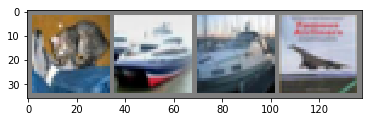

GroundTruth:    cat  ship  ship plane


In [21]:
#Test network by checking ground truth against results predicted by the network

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images to shwow ground truths
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
#see what the network predicts
#produces an output that are energies of the 10 classes, higher energy of a class means
#the network thinks the image belongs to that class.
outputs = net(images)

In [22]:
#printing predicted outputs
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog plane truck   dog


In [23]:
#testing on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [24]:
#what are the accuracy of each of the classes/
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 60 %
Accuracy of   car : 64 %
Accuracy of  bird : 26 %
Accuracy of   cat : 47 %
Accuracy of  deer : 33 %
Accuracy of   dog : 30 %
Accuracy of  frog : 80 %
Accuracy of horse : 62 %
Accuracy of  ship : 47 %
Accuracy of truck : 82 %
